In [1]:
from pycaret.classification import ClassificationExperiment
import pandas as pd
from pathlib import Path

# Set the working directory
BASE_DIR = Path().resolve()
DATA_DIR = BASE_DIR / 'data'

# Example dataset
data = pd.read_csv(DATA_DIR / 'train.csv')
test = pd.read_csv(DATA_DIR / 'test.csv')
clf = ClassificationExperiment()
setup = clf.setup(data, target='Churn', test_data=test, index=False, fold_shuffle=True, fold=5)

,Description,Value
0,Session id,1150
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(10312, 17)"
4,Transformed data shape,"(10312, 17)"
5,Transformed train set shape,"(8250, 17)"
6,Transformed test set shape,"(2062, 17)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


In [14]:
setup.pull()

,Description,Value
0,Session id,7219
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(10312, 17)"
4,Transformed data shape,"(10312, 17)"
5,Transformed train set shape,"(8250, 17)"
6,Transformed test set shape,"(2062, 17)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


In [15]:
models = ['lr', 'nb', 'rf']
# models = ['lr', 'knn', 'nb', 'dt', 'svm', 'rf', 'lightgbm']
best = clf.compare_models(include=models)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8552,0.9336,0.8528,0.8570,0.8548,0.7103,0.7105,0.1170
lr,Logistic Regression,0.7872,0.8775,0.8014,0.7796,0.7901,0.5743,0.5749,0.6940
nb,Naive Bayes,0.7618,0.8442,0.8335,0.7291,0.7777,0.5236,0.5293,0.2950


Processing:   0%|          | 0/17 [00:00<?, ?it/s]

In [16]:
clf.calibrate_model(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8473,0.9279,0.8010,0.8824,0.8397,0.6945,0.6975
1,0.8558,0.9332,0.8058,0.8949,0.8480,0.7115,0.7150
2,0.8473,0.9160,0.8180,0.8686,0.8425,0.6945,0.6957
3,0.8594,0.9259,0.8204,0.8895,0.8535,0.7188,0.7209
4,0.8570,0.9340,0.8422,0.8675,0.8547,0.7139,0.7142
5,0.8558,0.9395,0.8160,0.8868,0.8499,0.7115,0.7138
6,0.8788,0.9446,0.8402,0.9108,0.8741,0.7576,0.7599
7,0.8570,0.9300,0.8160,0.8892,0.8510,0.7140,0.7164
8,0.8545,0.9392,0.8111,0.8886,0.8481,0.7091,0.7118


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

CalibratedClassifierCV(cv=5, ensemble=True,
                       estimator=RandomForestClassifier(bootstrap=True,
                                                        ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features='sqrt',
                                                        max_leaf_nodes=None,
                                                        max_samples=None,
                                                        min_impurity_decrease=0.0,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        monotonic_cst=None,
                                                        n_estimators=100,
                                                        n_jobs=-1,
                                                        oob_score=False,
                                                        random_state=7219,
                                                        verbose=0,
                                                        warm_start=False),
                       method='sigmoid', n_jobs=None)

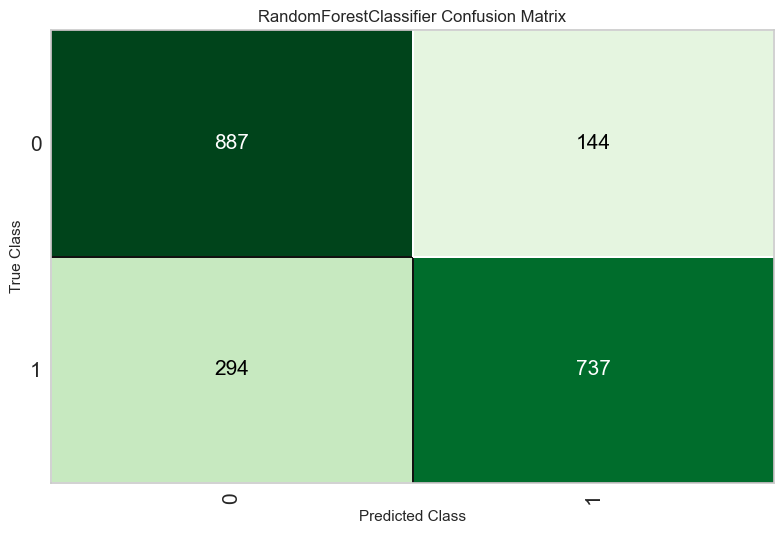

In [ ]:
fig = clf.plot_model(best, plot='confusion_matrix')

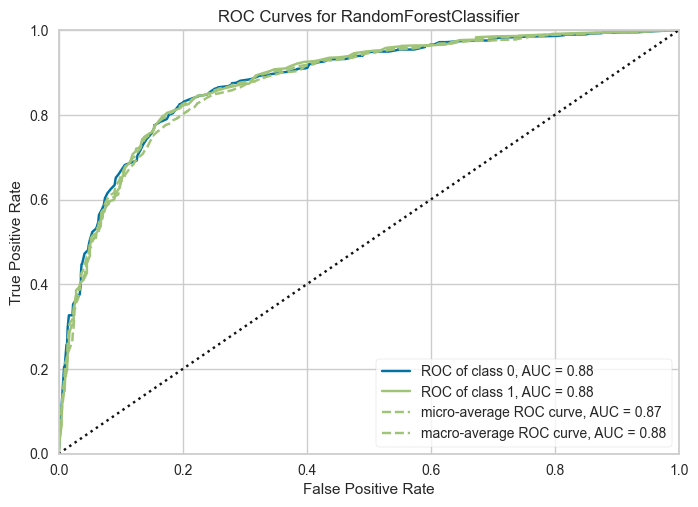

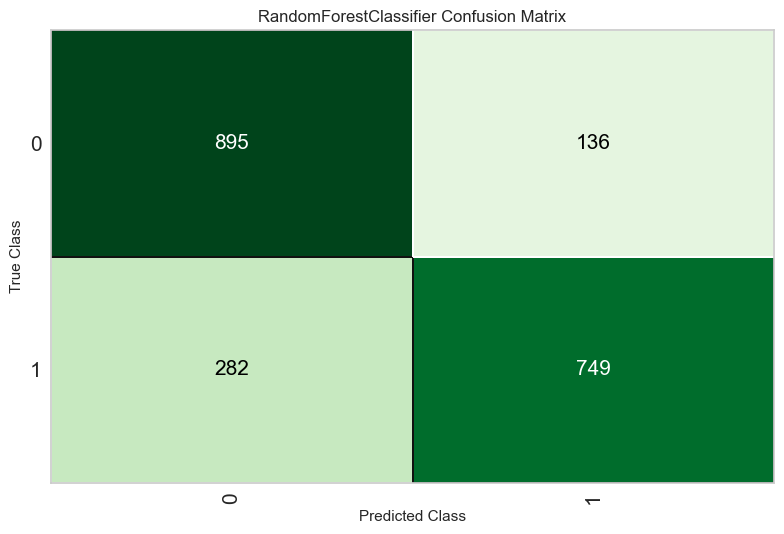

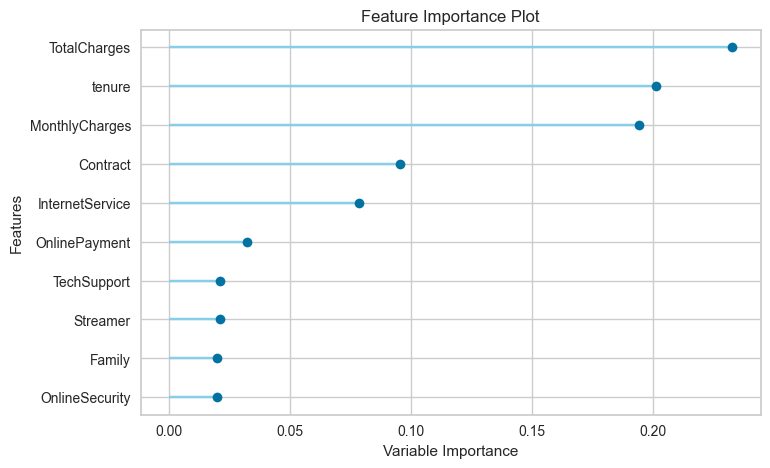

In [4]:
clf.plot_model(best, plot="auc")
clf.plot_model(best, plot="confusion_matrix")
clf.plot_model(best, plot="feature")

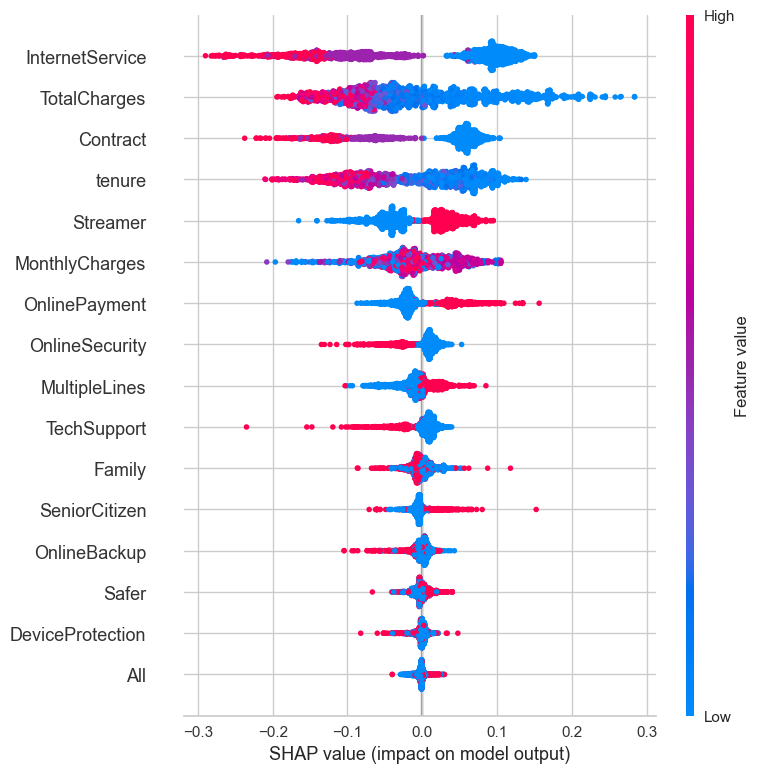

In [6]:
# clf.interpret_model(best)